In [60]:
# Importing Required Libraries

import pydriller 
from pydriller import ModificationType, Git, Repository
import pandas as pd
import subprocess
from pathlib import Path
from git.repo import Repo
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
from collections import Counter
from datetime import datetime
import os

In [61]:

# Path to the repository
repo_path = Path('./mastodon')
path_to_repo = './mastodon'

# Check if the repository exists
if repo_path.exists():
    print('Repository exists!')
else:
    # Clone the repository
    subprocess.call(['git', 'clone', 'git://github.com/tootsuite/mastodon.git'])


index_name = "mastodon"
start_tag =  'v3.4.0'
current_tag = 'v3.5.3'
file_type = '.rb'


repo = pydriller.Repository('./mastodon', order ="data-order", from_tag=start_tag, to_tag=current_tag)



Repository exists!


In [62]:
from enum import Enum


class Modification(Enum):
    ADDED = "Lines added"
    REMOVED = "Lines removed"
    TOTAL = "Lines added + lines removed"
    DIFF = "Lines added - lines removed"

In [63]:
author_files_dict = {}

for commit in repo.traverse_commits():
    author = commit.author.email
    files = [
        x.new_path if x.new_path else x.old_path
        for x in commit.modified_files
        if (x.old_path and x.old_path.endswith(file_type))
        or (x.new_path and x.new_path.endswith(file_type))
    ]
    if author in author_files_dict:
        author_files_dict[author].update(files)
    elif len(files) > 0:
        author_files_dict[author] = set(files)

In [64]:
author_number_mod_files = dict((k, len(v)) for (k, v) in author_files_dict.items())
author_number_mod_files

{'eugen@zeonfederated.com': 511,
 'claire.github-309c@sitedethib.com': 360,
 'kjwonmail@gmail.com': 21,
 'davesterry@gmail.com': 1,
 'eltociear@gmail.com': 1,
 'noel.yoshiba@gmail.com': 29,
 'holgerhuo@outlook.com': 5,
 'git@baby-gnu.org': 2,
 'truongnmt.dev@gmail.com': 2,
 '49699333+dependabot[bot]@users.noreply.github.com': 4,
 'fios@foramnagaidhlig.net': 2,
 'sandro.jaeckel@gmail.com': 1,
 'satosamu@gmail.com': 1,
 '65112898+heguro@users.noreply.github.com': 1,
 'account@kgtkr.net': 1,
 'wonderfall@protonmail.com': 1,
 'zundan@gmail.com': 1,
 '66512512+helloworldstack@users.noreply.github.com': 1,
 'luzpaz@users.noreply.github.com': 12,
 '44816995+Kawsay@users.noreply.github.com': 1,
 'mitarashi_dango@mail.matcha-soft.com': 1,
 '2119212+jsoref@users.noreply.github.com': 23,
 'l.groothuijsen@alumni.maastrichtuniversity.nl': 1,
 'chandrn@umich.edu': 3,
 'ykzts@desire.sh': 3,
 '428rinsuki+git@gmail.com': 1,
 '34298117+single-right-quote@users.noreply.github.com': 3,
 '84288771+dogelove

In [65]:
file_author_dict = {}

for commit in repo.traverse_commits():
    author = commit.author.email
    files = [
        x.new_path if x.new_path else x.old_path
        for x in commit.modified_files
        if (x.old_path and x.old_path.endswith(file_type))
        or (x.new_path and x.new_path.endswith(file_type))
    ]
    for file in files:
        if file in file_author_dict:
            file_author_dict[file].add(author)
        elif len(files) > 0:
            file_author_dict[file] = {author}

In [66]:
file_number_mod_authors = dict((k, len(v)) for (k, v) in file_author_dict.items())
dict((k, v) for (k, v) in file_number_mod_authors.items() if v > 3)

{'config/application.rb': 4,
 'lib/mastodon/search_cli.rb': 4,
 'config/initializers/omniauth.rb': 4,
 'app/models/status.rb': 4,
 'config/environments/production.rb': 5,
 'app/chewy/statuses_index.rb': 4,
 'config/initializers/rack_attack.rb': 4,
 'app/lib/feed_manager.rb': 4}

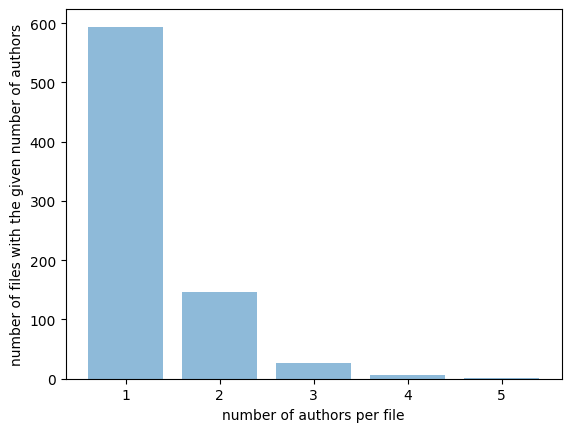

In [67]:
author_changes = file_number_mod_authors.values()
counts = Counter(author_changes)

x_values = range(1, max(counts.keys()) + 1)
y_values = [counts[x] for x in x_values]

plt.bar(x_values, y_values, align="center", alpha=0.5)
plt.ylabel("number of files with the given number of authors")
plt.xlabel("number of authors per file")
plt.show()

In [ ]:
#  Number of commits by each author

class Author:
    def __init__(self, name, email):
        self.name = name
        self.email = email
        commits = 0
        files_modified = set()

    
author_commits = {}

for commit in repo.traverse_commits():

    author = commit.author.email
    files = [
        x.new_path if x.new_path else x.old_path
        for x in commit.modified_files
        if (x.old_path and x.old_path.endswith(file_type))
        or (x.new_path and x.new_path.endswith(file_type))
    ]
    if author in author_commits:
        author_commits[author].commits += 1
        author_commits[author].files_modified.update(files)
    elif len(files) > 0:
        author_commits[author] = Author(commit.author.name, author)
        author_commits[author].commits = 1
        author_commits[author].files_modified = set(files)

author_commits



In [94]:
for author in author_commits.values():
    print(author.name, author.email, "Number of Commits: " + str(author.commits), "Number of Modified Files: ", len(author.files_modified))

Eugen Rochko eugen@zeonfederated.com Number of Commits: 193 Number of Modified Files:  511
Claire claire.github-309c@sitedethib.com Number of Commits: 230 Number of Modified Files:  360
Jeong Arm kjwonmail@gmail.com Number of Commits: 28 Number of Modified Files:  21
David Sterry davesterry@gmail.com Number of Commits: 4 Number of Modified Files:  1
Ikko Ashimine eltociear@gmail.com Number of Commits: 1 Number of Modified Files:  1
Takeshi Umeda noel.yoshiba@gmail.com Number of Commits: 10 Number of Modified Files:  29
Holger holgerhuo@outlook.com Number of Commits: 4 Number of Modified Files:  5
Daniel git@baby-gnu.org Number of Commits: 2 Number of Modified Files:  2
Truong Nguyen truongnmt.dev@gmail.com Number of Commits: 1 Number of Modified Files:  2
dependabot[bot] 49699333+dependabot[bot]@users.noreply.github.com Number of Commits: 390 Number of Modified Files:  4
gunchleoc fios@foramnagaidhlig.net Number of Commits: 2 Number of Modified Files:  2
Sandro sandro.jaeckel@gmail.com

In [95]:
#  Get author by email
auther_email = "eugen@zeonfederated.com"



for author in author_commits.values():
    if author.email == auther_email:
        print(author.name, author.email, "Number of Commits: " + str(author.commits), "Number of Modified Files: ", len(author.files_modified))

Eugen Rochko eugen@zeonfederated.com Number of Commits: 193 Number of Modified Files:  511


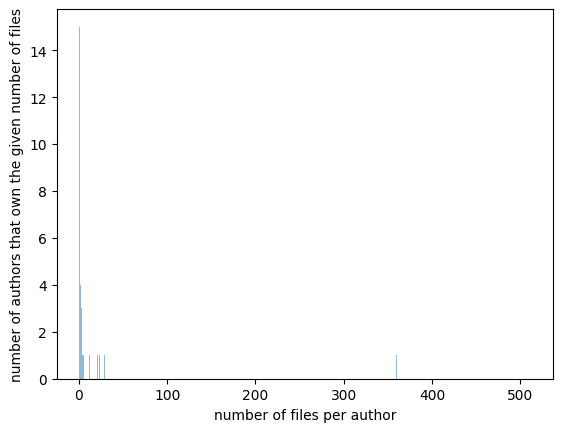

In [68]:
file_changes = author_number_mod_files.values()
counts = Counter(file_changes)

x_values = range(1, max(counts.keys()) + 1)
y_values = [counts[x] for x in x_values]

plt.bar(x_values, y_values, align="center", alpha=0.5)
plt.ylabel("number of authors that own the given number of files")
plt.xlabel("number of files per author")
plt.show()

In [69]:
def get_author_modifications(path, modification_type):
    author_changes_dict = {}
    for commit in repo.traverse_commits():
        for file in commit.modified_files:
            if (file.old_path and file.old_path.startswith(path)) or (
                file.new_path and file.new_path.startswith(path)
            ):
                author = commit.author.email
                changes = (
                    file.added_lines
                    if modification_type == Modification.ADDED
                    else file.deleted_lines
                    if modification_type == Modification.REMOVED
                    else file.added_lines + file.deleted_lines
                    if modification_type == Modification.TOTAL
                    else file.added_lines - file.deleted_lines
                    if modification_type == Modification.DIFF
                    else 0
                )
                if author in author_changes_dict:
                    author_changes_dict[author] += changes
                else:
                    author_changes_dict[author] = changes
    return author_changes_dict

In [70]:
packages = [
    "app/controllers",
    "app/lib",
    "app/models",
    "app/services",
    "app/workers",
]

In [71]:
author_contributions = [
    get_author_modifications(path, Modification.TOTAL) for path in packages
]

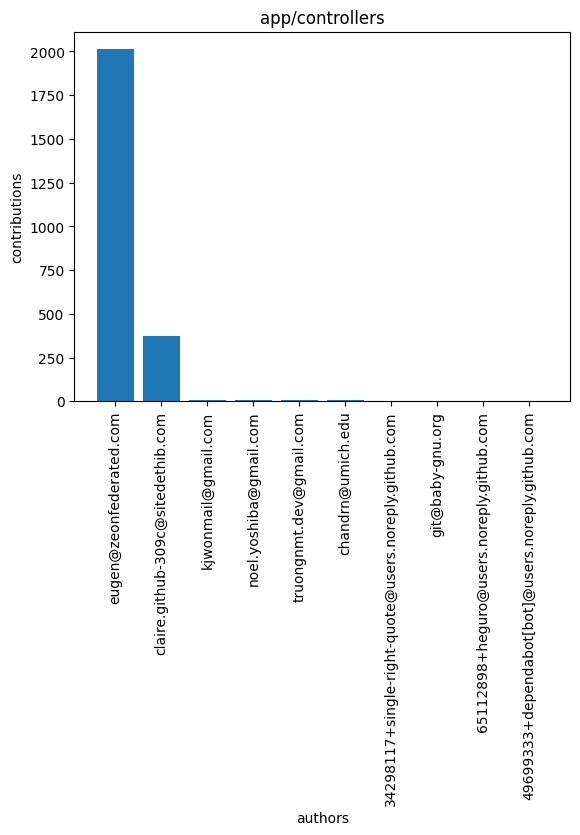

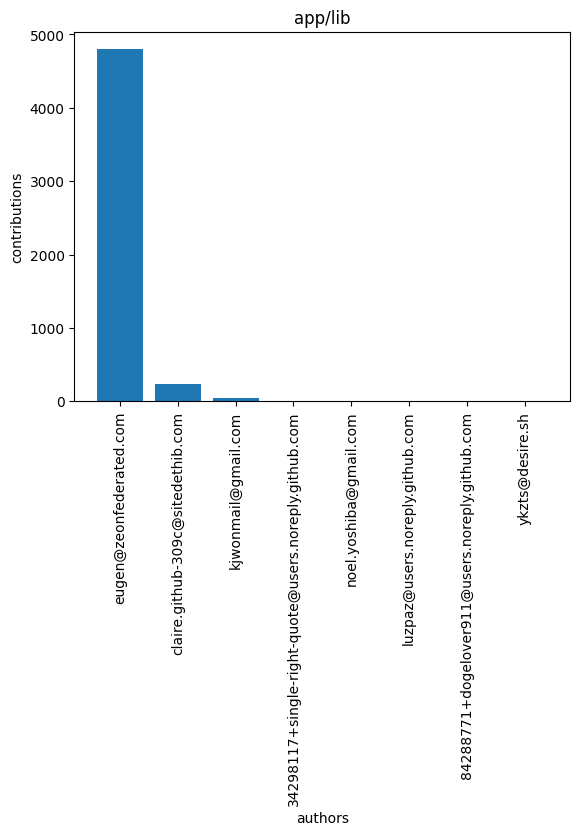

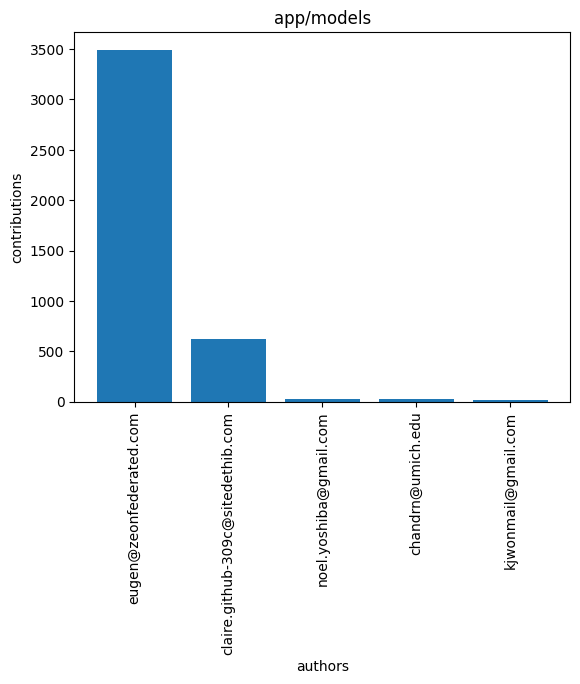

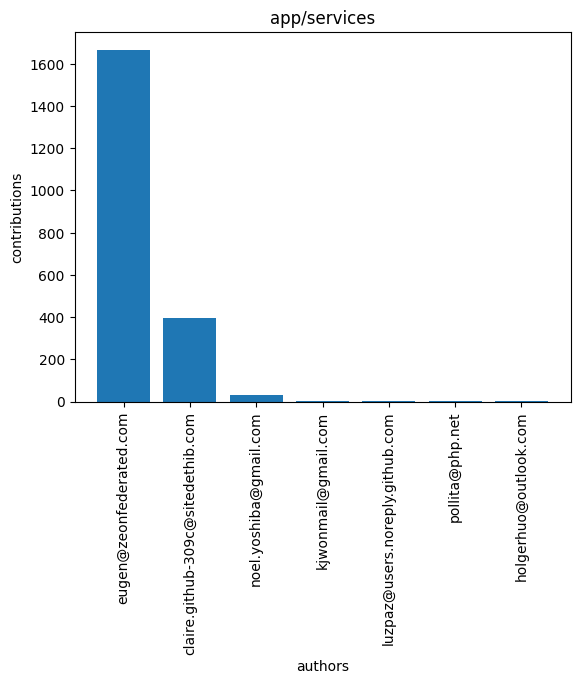

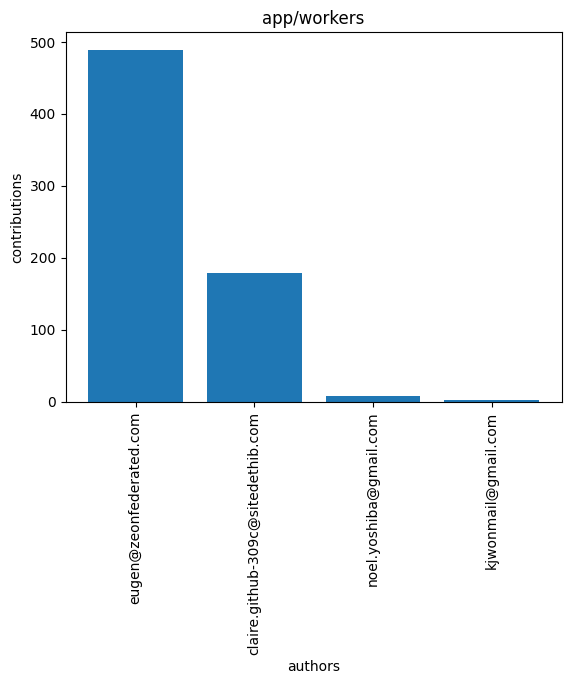

In [72]:
for i, file in enumerate(packages):
    packages_contributions = [
        {"email": k, "contributions": v} for (k, v) in author_contributions[i].items()
    ]

    packages_contributions.sort(key=lambda x: x["contributions"], reverse=True)

    plt.bar(
        [x["email"] for x in packages_contributions],
        [x["contributions"] for x in packages_contributions],
    )
    plt.title(file)
    plt.tick_params("x", rotation=90)
    plt.xlabel("authors")
    plt.ylabel("contributions")
    plt.show()

# Knowledge Loss

In [73]:
all_contributions_by_author = get_author_modifications("", Modification.TOTAL)

main_contributor = max(all_contributions_by_author, key=all_contributions_by_author.get)
main_contributor

'eugen@zeonfederated.com'

In [74]:
contributions_per_file = {}
for commit in repo.traverse_commits():
    author = commit.author.email
    for file in commit.modified_files:
        file_path = file.new_path if file.new_path else file.old_path
        if not file_path.endswith(file_type):
            continue
        changes = file.added_lines + file.deleted_lines
        if file_path in contributions_per_file:
            contributions_per_file[file_path]["total"] += changes
            if author == main_contributor:
                contributions_per_file[file_path]["contributor"] += changes
        else:
            contributions_per_file[file_path] = {
                "total": changes,
                "contributor": changes if author == main_contributor else 0,
            }

In [75]:
output_dict = {"name": "root", "children": []}



for path in contributions_per_file.keys():
    splitted_path = path.split("/")
    root = output_dict
    for i, split in enumerate(splitted_path):
        if any(x for x in root["children"] if x["name"] == split):
            root = next(x for x in root["children"] if x["name"] == split)
        else:
            new_node = {"name": split, "children": []}
            if i == len(splitted_path) - 1 and contributions_per_file[path]["total"] > 0:
                new_node["size"] = contributions_per_file[path]["total"]
                new_node["weight"] = contributions_per_file[path]["total"]
                new_node["ownership"] = (
                    contributions_per_file[path]["contributor"]
                    / contributions_per_file[path]["total"]
                )
                new_node["author_color"] = "red"
            root["children"].append(new_node)
            root = new_node

In [76]:
import json

with open("output.json", "w") as file:
    json.dump(output_dict, file, indent=4)

app/services/unfollow_service.rb


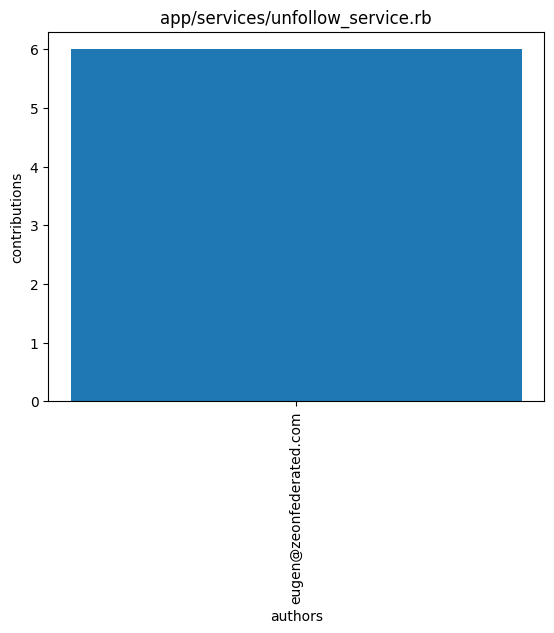

In [77]:

print(path)

packages_contributions = [
    {"email": k, "contributions": v}
    for (k, v) in get_author_modifications(path, Modification.TOTAL).items()
]

packages_contributions.sort(key=lambda x: x["contributions"], reverse=True)

plt.bar(
    [x["email"] for x in packages_contributions],
    [x["contributions"] for x in packages_contributions],
)
plt.title(path)
plt.tick_params("x", rotation=90)
plt.xlabel("authors")
plt.ylabel("contributions")
plt.show()

# Churn Analysis

In [78]:
daily_contribution_dict = {}

for commit in repo.traverse_commits():
    date = commit.committer_date.date()

    if date in daily_contribution_dict:
        daily_contribution_dict[date]["additions"] += commit.insertions
        daily_contribution_dict[date]["deletions"] += commit.deletions
    else:
        daily_contribution_dict[date] = {
            "additions": commit.insertions,
            "deletions": commit.deletions,
        }

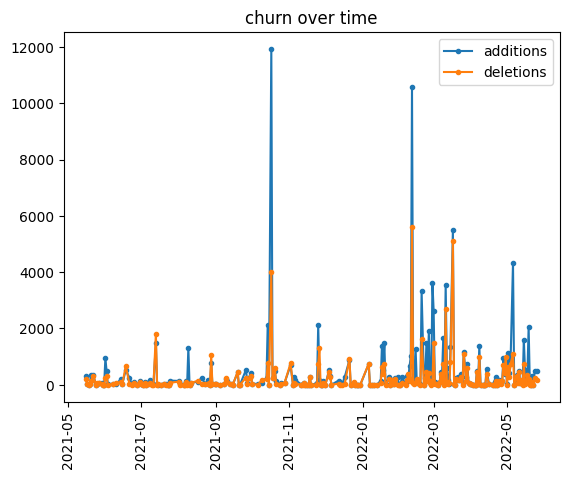

In [79]:
x_values = daily_contribution_dict.keys()
y_values_additions = [x["additions"] for x in daily_contribution_dict.values()]
y_values_deletions = [x["deletions"] for x in daily_contribution_dict.values()]

plt.plot(x_values, y_values_additions, marker=".", label="additions")
plt.plot(x_values, y_values_deletions, marker=".", label="deletions")
plt.legend()
plt.title("churn over time")
plt.tick_params("x", rotation=90)

In [80]:
since_date = datetime(2021, 2, 26, 0, 0, 0, 0)

to_date = datetime(2022, 2, 27, 0, 0, 0, 0)

daily_repo = Repository(
    path_to_repo,
    order="date-order",
    since=since_date,
    to=to_date,
)

for commit in daily_repo.traverse_commits():
    print(commit.hash[:8], commit.insertions, commit.deletions)
    if commit.insertions > 100 or commit.deletions > 100:
        print([x.new_path if x.new_path else x.old_path for x in commit.modified_files])
    print()

75189af5 1 0

44609f76 5 5

f896d858 322 185
['package.json', 'yarn.lock']

f24674d0 10 41

210084bb 11 13

9de8a8cb 7 18

715f6cfa 5 5

882a3cdc 7 7

b9231c45 5 5

73264e07 40 78

0635c876 38 11

2577b79b 101 103
['package.json', 'yarn.lock']

6fb4efd0 15 16

b4cb8c3c 6 6

9aa37b32 72 23

7f9bb105 3 3

a65ff30b 4 4

9ff53385 3 3

8f5022e6 1 1

287aa75f 3 3

ee111920 27 2

a8139ab0 20 2

65db2625 99 214
['Gemfile', 'Gemfile.lock', 'app/javascript/mastodon/features/compose/util/counter.js', 'app/javascript/mastodon/features/compose/util/url_regex.js', 'app/lib/extractor.rb', 'app/lib/formatter.rb', 'app/services/fetch_link_card_service.rb', 'app/validators/status_length_validator.rb', 'config/initializers/twitter_regex.rb', 'package.json', 'spec/lib/formatter_spec.rb', 'spec/validators/status_length_validator_spec.rb', 'yarn.lock']

5614e672 52 16

27d3fc99 5 5

0e982e75 5 5

c2805634 5 5

c27d3202 3 3

59c6aab7 5 5

a0ac5987 5 5

a6b127ea 2 2

c3786b29 2 2

67c5cdea 4 128
['app/views/a

In [81]:
daily_repo = Repository(
    path_to_repo,
    order="date-order",
    since=since_date,
    to=to_date,
)

for commit in daily_repo.traverse_commits():
    print(commit.hash[:8], commit.insertions, commit.deletions)
    if commit.insertions > 100 or commit.deletions > 100:
        print([x.new_path if x.new_path else x.old_path for x in commit.modified_files])
    print()

75189af5 1 0

44609f76 5 5

f896d858 322 185
['package.json', 'yarn.lock']

f24674d0 10 41

210084bb 11 13

9de8a8cb 7 18

715f6cfa 5 5

882a3cdc 7 7

b9231c45 5 5

73264e07 40 78

0635c876 38 11

2577b79b 101 103
['package.json', 'yarn.lock']

6fb4efd0 15 16

b4cb8c3c 6 6

9aa37b32 72 23

7f9bb105 3 3

a65ff30b 4 4

9ff53385 3 3

8f5022e6 1 1

287aa75f 3 3

ee111920 27 2

a8139ab0 20 2

65db2625 99 214
['Gemfile', 'Gemfile.lock', 'app/javascript/mastodon/features/compose/util/counter.js', 'app/javascript/mastodon/features/compose/util/url_regex.js', 'app/lib/extractor.rb', 'app/lib/formatter.rb', 'app/services/fetch_link_card_service.rb', 'app/validators/status_length_validator.rb', 'config/initializers/twitter_regex.rb', 'package.json', 'spec/lib/formatter_spec.rb', 'spec/validators/status_length_validator_spec.rb', 'yarn.lock']

5614e672 52 16

27d3fc99 5 5

0e982e75 5 5

c2805634 5 5

c27d3202 3 3

59c6aab7 5 5

a0ac5987 5 5

a6b127ea 2 2

c3786b29 2 2

67c5cdea 4 128
['app/views/a